In [61]:
# compare the sextractor catalog from my stacked image
# to the dophot catalog that Brian Stalder ran

In [62]:
import sys # needed to import cat_utils 
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [63]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/Users/abrahamn/21cmIR/21cmIRxcor/cat_utils.pyc'>

In [64]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
dphcat = cat_utils.IRCatalog(dph_path=raw_frames_path+'02a57694o0326I.dph',fits_path=analysis_root+'/02a57694o0326I/02a57694o0326I_5degframecentered.fits')

loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0326I.dph
identifying and excluding artifacts (ie, saturated pixels)


In [75]:
secat = cat_utils.IRCatalog(se_path=analysis_root+'field0/field0.sex',fits_path=analysis_root+'/field0/field0.fits')

loading/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/field0/field0.sex
identifying and excluding artifacts (ie, saturated pixels)


(-25, -24.5)

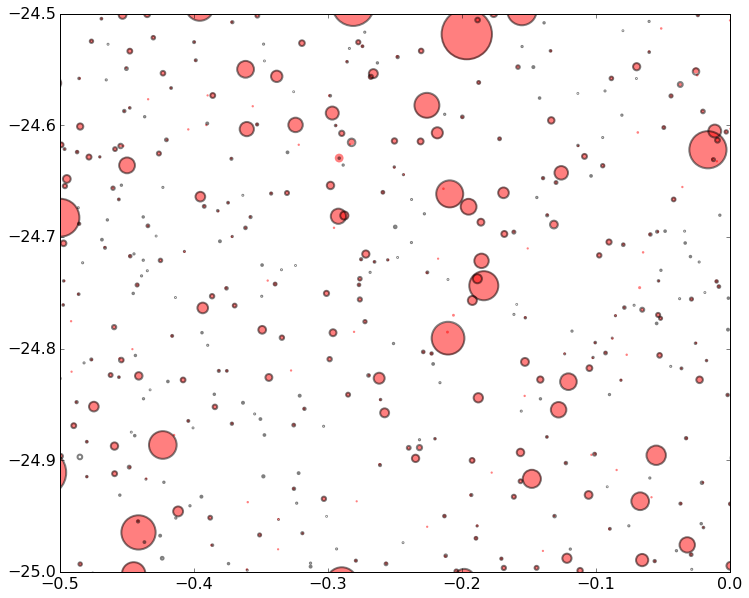

In [78]:
plt.figure(figsize=(12,10))
plt.scatter(dphcat.ra,dphcat.dec,15000*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.scatter(secat.ra,secat.dec,15000*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.xlim([-.5,0])
plt.ylim([-25,-24.5])

(30, 31)
(30, 31)


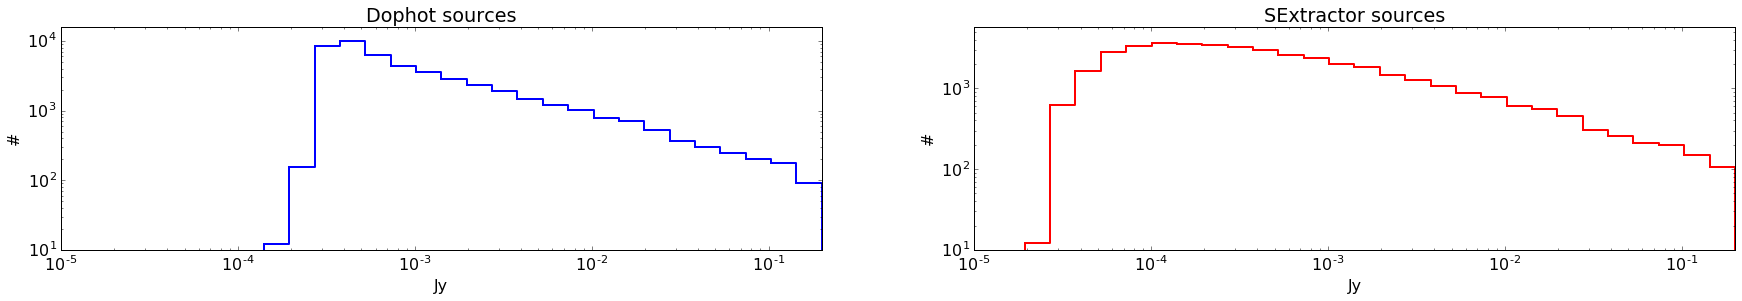

In [77]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(plt,dphcat.jy[dphcat.jy<5],.00001,.2,30,'b')
plt.xlim([.00001,.2])#plt.xlim([0,.01])
plt.title('Dophot sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(plt,secat.jy[secat.jy<5],.00001,.2,30,'r')
plt.xlim([.00001,.2])
#plt.xlim([0,10])
plt.title('SExtractor sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

(74866,)